# Import package


In [2]:
# install numpy
# install pandas
# install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor 

# Cleaning data (Làm sạch dữ liệu)

In [3]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train],ignore_index = True)


In [4]:
data_frame

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Remote unnecessary columns

In [5]:
data_frame = data_frame.sort_values(by = 'id')
data_frame = data_frame.drop(columns='Unnamed: 0')
# data_frame = data_frame.drop(columns = 'id')

In [6]:
data_frame

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
116107,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
73841,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
70401,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
122426,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
98500,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
12884,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
58949,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
108028,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


Xử lí dữ liệu trùng (Duplicate Data)

In [7]:
print(data_frame.duplicated().sum())
data_frame.drop_duplicates(inplace=True)
data_frame

0


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
116107,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
73841,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
70401,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
122426,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
98500,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
12884,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
58949,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
108028,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


Xử lí dữ liệu thiếu (Missing Data)

In [8]:

print(data_frame.isnull().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [9]:

temp = np.round(data_frame['Arrival Delay in Minutes'].mean(),2)

data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


C:\Users\abc\AppData\Local\Temp\ipykernel_4220\592716239.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


In [10]:
data_frame.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
data_frame

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
116107,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
73841,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
70401,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
122426,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
98500,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
12884,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
58949,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
108028,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


 Xử lí ngoại lai sử dụng IQR <Minh họa >


In [12]:
df_copy_ol = data_frame.copy()

n_columns = df_copy_ol.select_dtypes(include = 'number')
for column in n_columns.columns:
    G1 = df_copy_ol[column].quantile(0.25)
    G3 = df_copy_ol[column].quantile(0.75)
    IQR = G3 - G1
    lower_limit = G1 - 1.5*IQR
    upper_limit = G3 + 1.5*IQR
    df_copy_ol = df_copy_ol[(df_copy_ol[column] > lower_limit) & (df_copy_ol[column] < upper_limit)]
    outliers = len(data_frame) - len(df_copy_ol)
    print(f'Columns {column}: remove {outliers} outliers')
df_copy_ol

Columns id: remove 0 outliers
Columns Age: remove 0 outliers
Columns Flight Distance: remove 2864 outliers
Columns Inflight wifi service: remove 2864 outliers
Columns Departure/Arrival time convenient: remove 2864 outliers
Columns Ease of Online booking: remove 2864 outliers
Columns Gate location: remove 2864 outliers
Columns Food and drink: remove 2864 outliers
Columns Online boarding: remove 2864 outliers
Columns Seat comfort: remove 2864 outliers
Columns Inflight entertainment: remove 2864 outliers
Columns On-board service: remove 2864 outliers
Columns Leg room service: remove 2864 outliers
Columns Baggage handling: remove 2864 outliers
Columns Checkin service: remove 18702 outliers
Columns Inflight service: remove 18706 outliers
Columns Cleanliness: remove 18706 outliers
Columns Departure Delay in Minutes: remove 34383 outliers
Columns Arrival Delay in Minutes: remove 47299 outliers


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
116107,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
70401,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
122426,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
98500,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
65934,7,Male,Loyal Customer,43,Business travel,Business,1963,3,3,3,...,5,5,5,5,4,5,4,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123743,129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
79435,129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
2741,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
12884,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied


In [13]:
for i in data_frame.columns:
    print(data_frame[i].max(), data_frame[i].min())

129880 1
Male Female
disloyal Customer Loyal Customer
85 7
Personal Travel Business travel
Eco Plus Business
4983 31
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 1
5 0
5 0
5 0
1592 0
1584.0 0.0
satisfied neutral or dissatisfied


In [14]:
df_copy_ol.shape

(82581, 24)

In [15]:
df_copy_ol.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Rời rạc hóa dữ liệu

In [16]:
data_frame.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [17]:
n_columns.dtypes

id                                     int64
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [18]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
df_copy_ol[n_columns.columns] = discretizer.fit_transform(df_copy_ol[n_columns.columns])

c:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Chuyển đổi kiểu object thành Dataframe

In [19]:
from sklearn.preprocessing import LabelEncoder
o_columns = df_copy_ol.select_dtypes(include = 'object')
for column in o_columns:
    df_copy_ol[column] = LabelEncoder().fit_transform(df_copy_ol[column])
df_copy_ol

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
116107,0.0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
70401,0.0,1,0,2.0,0,0,1.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
122426,0.0,1,0,2.0,0,0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
98500,0.0,0,0,2.0,0,0,4.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
65934,0.0,1,0,2.0,0,0,2.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123743,4.0,0,0,1.0,1,2,0.0,4.0,2.0,4.0,...,3.0,0.0,4.0,2.0,3.0,3.0,3.0,0.0,0.0,0
79435,4.0,0,0,3.0,1,2,0.0,3.0,4.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,0
2741,4.0,1,0,1.0,1,2,0.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,0.0,1.0,0
12884,4.0,1,0,2.0,1,2,0.0,3.0,4.0,3.0,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,0.0,0.0,0


In [20]:
df_copy_ol = df_copy_ol.reset_index(drop = True)
df_copy_ol.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
1,0.0,1,0,2.0,0,0,1.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
2,0.0,1,0,2.0,0,0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
3,0.0,0,0,2.0,0,0,4.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
4,0.0,1,0,2.0,0,0,2.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
5,0.0,0,0,3.0,0,0,1.0,4.0,3.0,4.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,1.0,1
6,0.0,1,0,2.0,0,0,3.0,4.0,1.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,3.0,0.0,0.0,0
7,0.0,0,0,1.0,0,0,3.0,2.0,2.0,4.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,0.0,1
8,0.0,0,1,1.0,0,0,1.0,1.0,1.0,1.0,...,2.0,1.0,4.0,2.0,1.0,3.0,2.0,0.0,2.0,0
9,0.0,1,0,2.0,1,1,1.0,2.0,4.0,2.0,...,2.0,2.0,3.0,4.0,1.0,4.0,2.0,0.0,0.0,0


Chia dữ liệu

In [21]:
from sklearn.model_selection import train_test_split
x = df_copy_ol.drop(columns = 'satisfaction')
y = df_copy_ol['satisfaction']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
df_copy_ol.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
1,0.0,1,0,2.0,0,0,1.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
2,0.0,1,0,2.0,0,0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
3,0.0,0,0,2.0,0,0,4.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
4,0.0,1,0,2.0,0,0,2.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
5,0.0,0,0,3.0,0,0,1.0,4.0,3.0,4.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,1.0,1
6,0.0,1,0,2.0,0,0,3.0,4.0,1.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,3.0,0.0,0.0,0
7,0.0,0,0,1.0,0,0,3.0,2.0,2.0,4.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,0.0,1
8,0.0,0,1,1.0,0,0,1.0,1.0,1.0,1.0,...,2.0,1.0,4.0,2.0,1.0,3.0,2.0,0.0,2.0,0
9,0.0,1,0,2.0,1,1,1.0,2.0,4.0,2.0,...,2.0,2.0,3.0,4.0,1.0,4.0,2.0,0.0,0.0,0


### Chuẩn hóa dữ liệu 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Data Visualization (Trực quan hóa dữ liệu)

### Tính toán số liệu thống kê cơ bản 

In [23]:
i = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for j in i:
    print(j)
    print('mean: ', data_frame[j].mean())
    print('median: ', data_frame[j].median())
    print('mode: ', data_frame[j].mode())
    print('min: ', data_frame[j].min())
    print('max: ', data_frame[j].max())
    print()


Age
mean:  39.42795657530028
median:  40.0
mode:  0    39
Name: Age, dtype: int64
min:  7
max:  85

Flight Distance
mean:  1190.3163920542038
median:  844.0
mode:  0    337
Name: Flight Distance, dtype: int64
min:  31
max:  4983

Inflight wifi service
mean:  2.7286957191253465
median:  3.0
mode:  0    2
Name: Inflight wifi service, dtype: int64
min:  0
max:  5

Departure/Arrival time convenient
mean:  3.0575993224514937
median:  3.0
mode:  0    4
Name: Departure/Arrival time convenient, dtype: int64
min:  0
max:  5

Ease of Online booking
mean:  2.7568755774561136
median:  3.0
mode:  0    3
Name: Ease of Online booking, dtype: int64
min:  0
max:  5

Gate location
mean:  2.976924853711118
median:  3.0
mode:  0    3
Name: Gate location, dtype: int64
min:  0
max:  5

Food and drink
mean:  3.2047736372035724
median:  3.0
mode:  0    4
Name: Food and drink, dtype: int64
min:  0
max:  5

Online boarding
mean:  3.252633199876809
median:  3.0
mode:  0    4
Name: Online boarding, dtype: int64
m

### Phân bố 

### Genner, Customer Type, Type of Travel, Class, Satisfaction

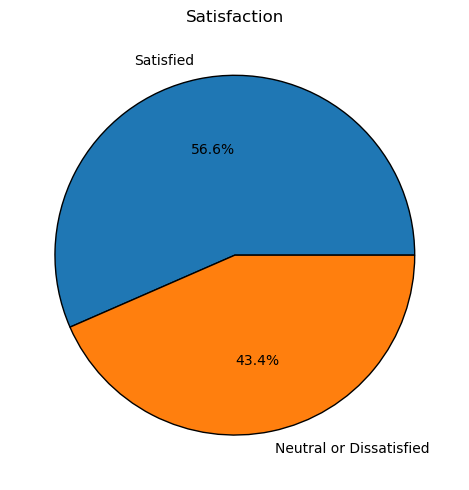

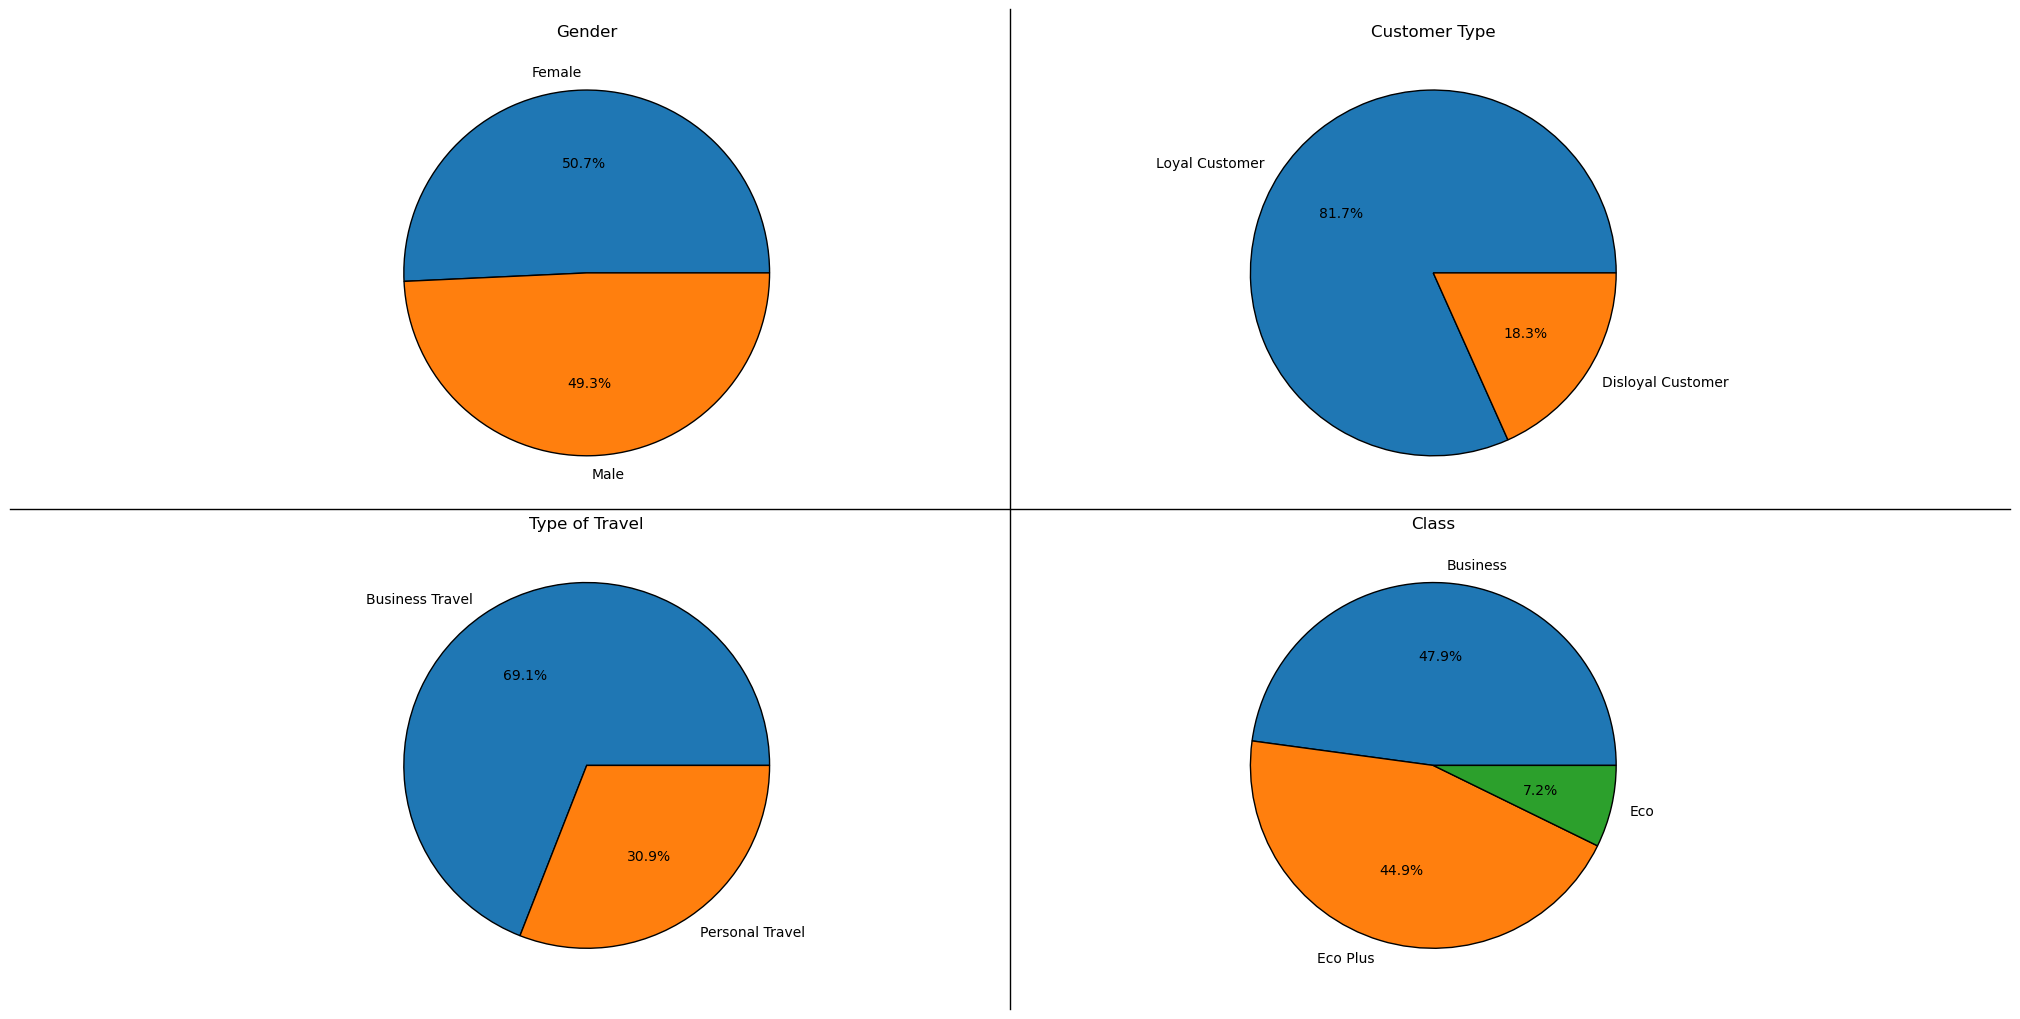

In [26]:
# Pie chart for Satisfaction
fig, ax = plt.subplots(figsize=(20, 5))
ax.pie(
    data_frame['satisfaction'].value_counts(),
    labels=['Satisfied', 'Neutral or Dissatisfied'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax.set_title("Satisfaction")
plt.tight_layout(rect=[0, 0, 1, 1])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color="black", linewidth=1, transform=fig.transFigure)) 
fig.add_artist(plt.Line2D([0, 1], [0.5, 0.5], color="black", linewidth=1, transform=fig.transFigure))  
# Pie chart for Gender
ax1.pie(
    data_frame['Gender'].value_counts(),
    labels=['Female', 'Male'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax1.set_title("Gender")

# Pie chart for Customer Type
ax2.pie(
    data_frame['Customer Type'].value_counts(),
    labels=['Loyal Customer', 'Disloyal Customer'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax2.set_title("Customer Type")

# Pie chart for Type of Travel
ax3.pie(
    data_frame['Type of Travel'].value_counts(),
    labels=['Business Travel', 'Personal Travel'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax3.set_title("Type of Travel")

# Pie chart for Class
ax4.pie(
    data_frame['Class'].value_counts(),
    labels=['Business', 'Eco Plus', 'Eco'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax4.set_title("Class")
plt.tight_layout(rect=[0, 0, 1, 1])

### Flight Distance,Departure Delay in Minutes, Arrival Delay in Minutes, 

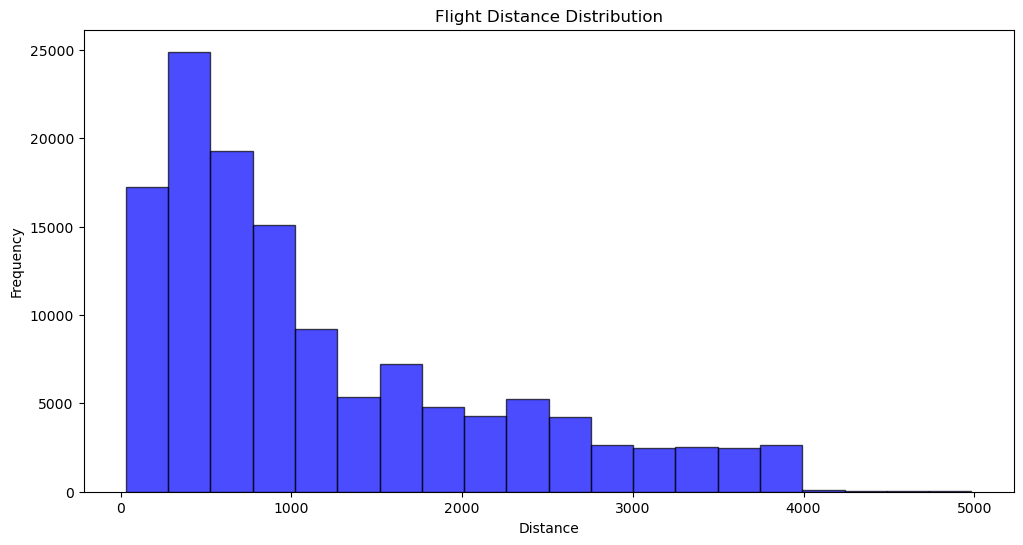

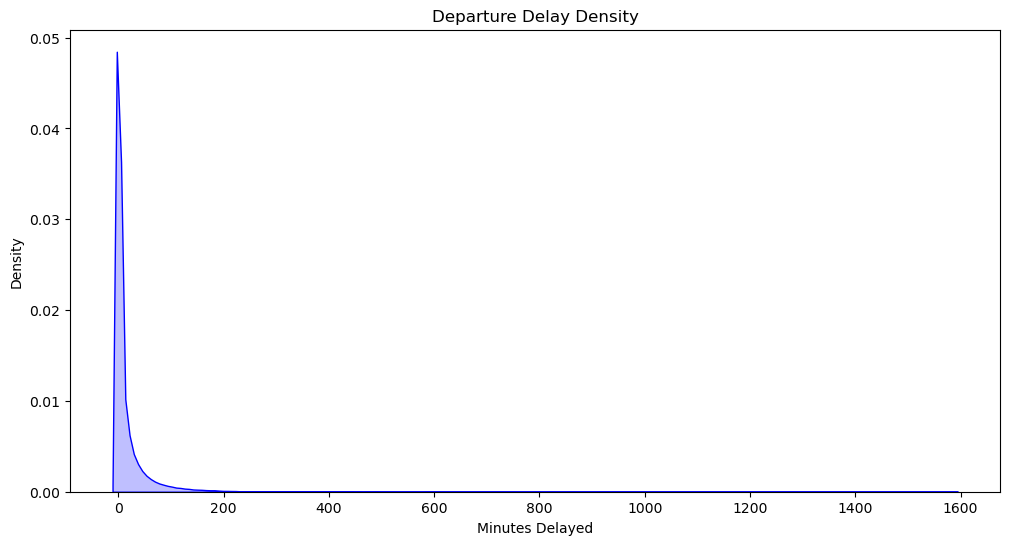

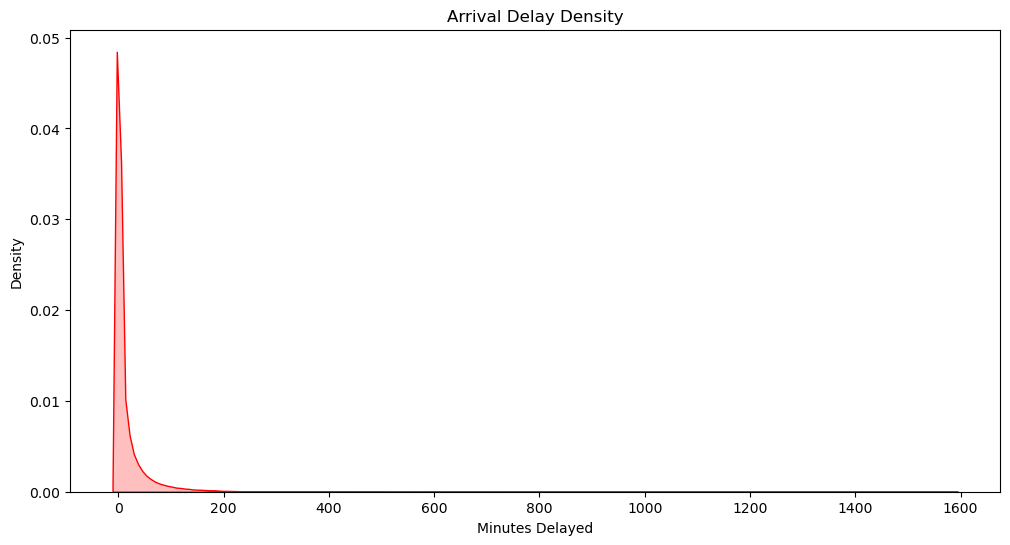

<Figure size 640x480 with 0 Axes>

In [33]:
# Histogram plot for Flight Distance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_frame['Flight Distance'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Flight Distance Distribution")
ax.set_xlabel("Distance")
ax.set_ylabel("Frequency")
plt.show()


# Line plot for Departure Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='blue', ax=ax)
ax.set_title("Departure Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("Density")
plt.show()

# Line plot for Arrival Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='red', ax=ax)
ax.set_title("Arrival Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("Density")
plt.show()
plt.tight_layout()
plt.show()

### Service

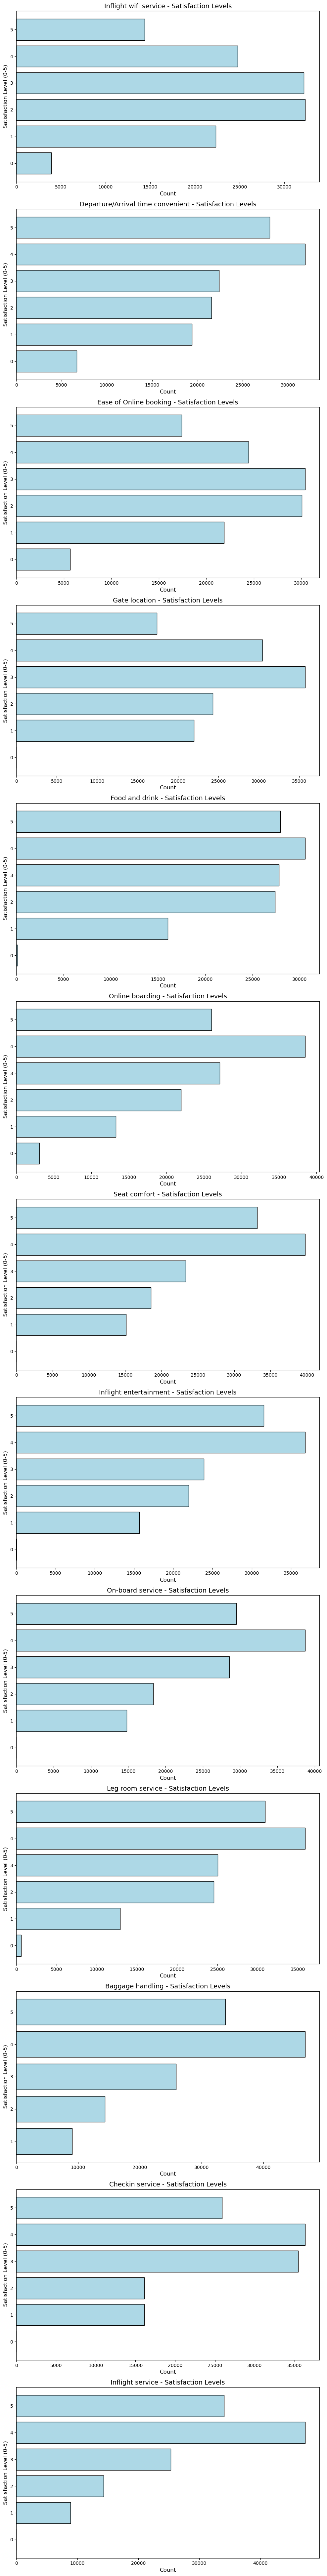

In [34]:
columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service'
]

# Tạo subplots để vẽ từng biểu đồ bar riêng biệt
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 6 * len(columns)))

# Vẽ từng biểu đồ bar cho mỗi dịch vụ
for i, col in enumerate(columns):
    axes[i].barh(data_frame[col].value_counts().sort_index().index, 
                 data_frame[col].value_counts().sort_index(), 
                 color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col} - Satisfaction Levels', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel('Satisfaction Level (0-5)', fontsize=12)

# Đặt khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

### Customer type and Personal travel impact on Satisfaction

,name,Tong,satisfaction,Percentage by Type (%)
0,Loyal Business,66114,0,29.382582
1,Loyal Personal,39986,0,89.896464
2,disloyal Business,23579,0,75.961661
3,disloyal Personal,201,0,84.079602
4,Loyal Business,66114,1,70.617418
5,Loyal Personal,39986,1,10.103536
6,disloyal Business,23579,1,24.038339
7,disloyal Personal,201,1,15.920398


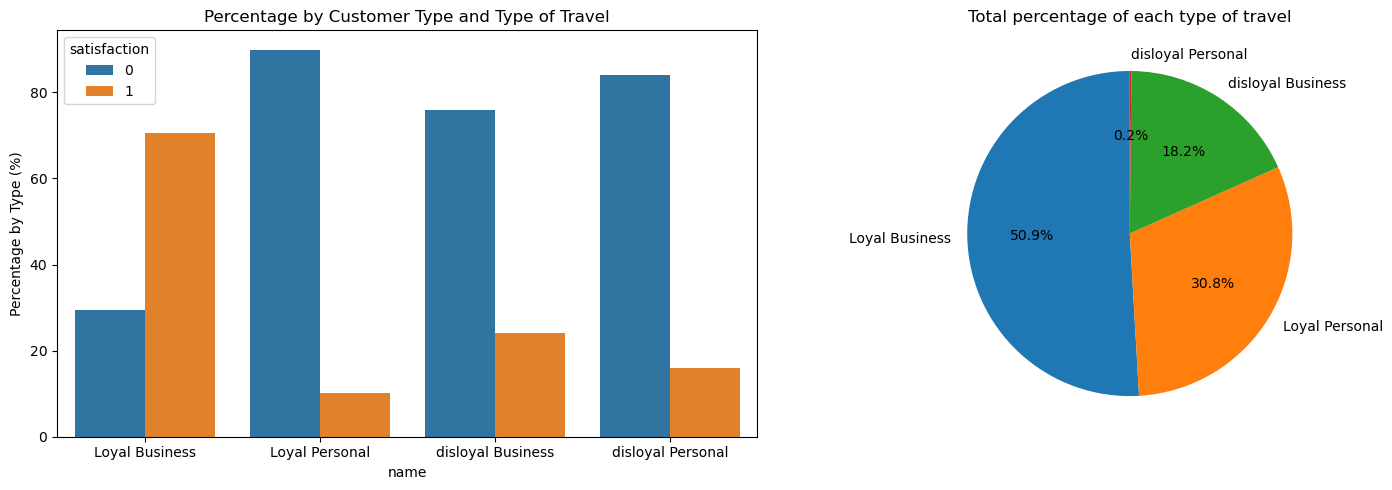

In [93]:
data_frame_copy_1 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_1['satisfaction'] = data_frame_copy_1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# create crosstab 
df_crosstab = pd.crosstab(
    index=[data_frame_copy_1['Customer Type'], data_frame_copy_1['Type of Travel']], 
    columns=data_frame_copy_1['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
total_count = df_crosstab.iloc[-1, -1]
# calculator percentage satisfaction by customer type and type of travel
df_crosstab[[0, 1]] = df_crosstab[[0, 1]].div(df_crosstab["Tong"], axis=0) * 100
percent = df_crosstab.sort_index().drop(index="Tong")
percent_reset = percent.reset_index()
percent_reset['name'] = percent_reset['Customer Type'].str.split().str[0] + " " + percent_reset['Type of Travel'].str.split().str[0]
# reshape table wide into long 
percent_long = percent_reset.melt(  id_vars=["name","Tong"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# first plot
sns.barplot(x="name", y="Percentage by Type (%)", hue="satisfaction", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
# second plot
labels = percent_long[0:4]["name"]
sizes = percent_long[0:4]["Tong"]  
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
ax2.set_title("Total percentage of each type of travel")
plt.tight_layout()
percent_long

### Service impact on satisfaction

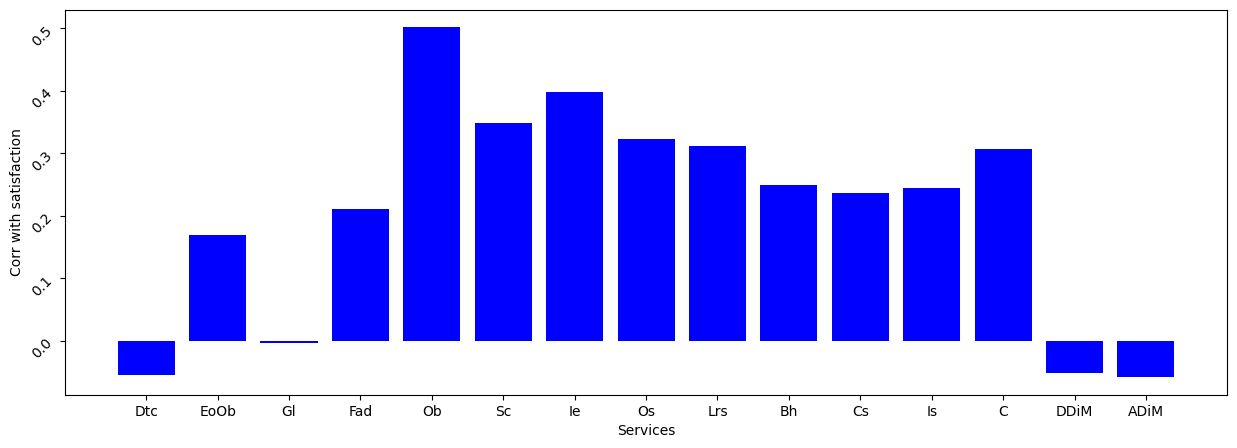

In [94]:
data_frame_copy_2 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_2['satisfaction'] = data_frame_copy_2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
columns = list(data_frame.columns)[8:25]
data_col = data_frame_copy_2[columns].copy()
#create a correlation matrix
matrix = data_col.corr()
satisfaction_matrix = matrix['satisfaction'].drop('satisfaction')
# create index of services
ar_index = []
for i in satisfaction_matrix.index:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
# plot 
fig,ax = plt.subplots(figsize= (15,5))
ax.bar(ar_index , satisfaction_matrix.values, color = 'blue')
plt.xlabel('Services')
plt.ylabel('Corr with satisfaction')
plt.yticks(rotation = 45)
plt.show()

### Relationship between Age and Flight Distance

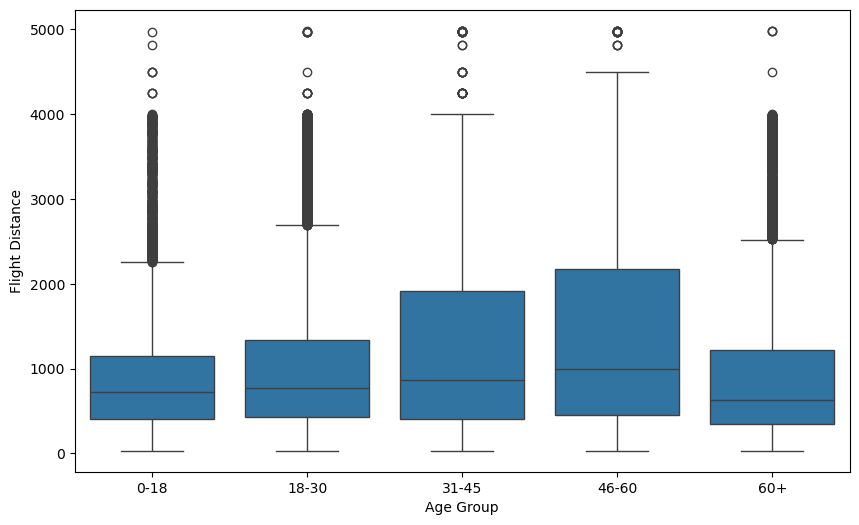

In [95]:
data_frame_copy_3 = data_frame.copy()
#index age
bins = [0, 18, 30, 45, 60, 100]  
labels = ['0-18','18-30', '31-45', '46-60', '60+']  
# cut age
data_frame_copy_3['Age Group'] = pd.cut(data_frame_copy_3['Age'], bins=bins, labels=labels)
data_frame_copy_3['Age Group'].value_counts()
# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Flight Distance', data=data_frame_copy_3);

### Relationship between Departure and Arrival Delay 

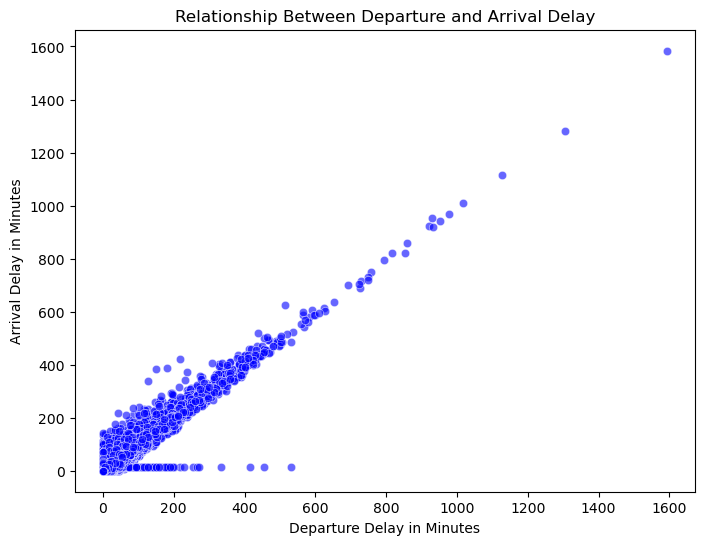

In [96]:
data_frame_copy_4 = data_frame.copy()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_frame_copy_4, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', alpha=0.6, color='blue')
plt.title('Relationship Between Departure and Arrival Delay')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.show()


In [97]:
data_frame.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

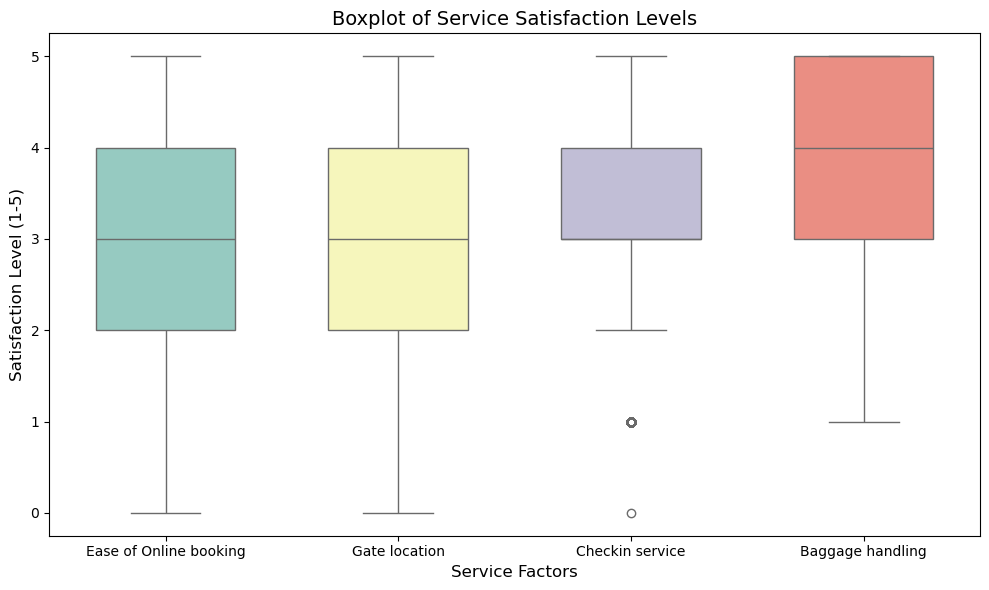

In [98]:
data_frame_copy_5 = data_frame.copy()
service_columns = ['Ease of Online booking','Gate location', 'Checkin service', 'Baggage handling']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame_copy_5[service_columns], palette="Set3", width=0.6)
plt.title("Boxplot of Service Satisfaction Levels", fontsize=14)
plt.ylabel("Satisfaction Level (1-5)", fontsize=12)
plt.xlabel("Service Factors", fontsize=12)
plt.tight_layout()
plt.show()

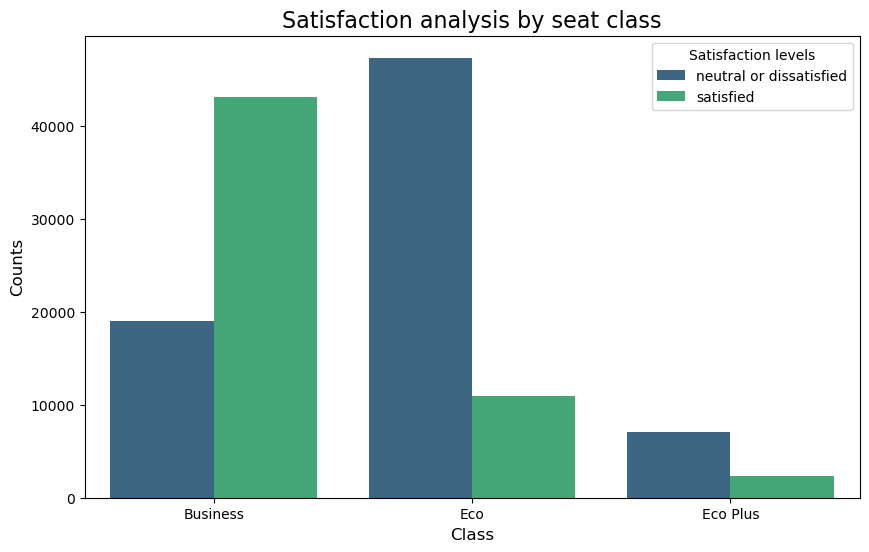

In [99]:
data_frame_copy_6 =data_frame.copy()
satisfaction_counts = data_frame_copy_6.groupby(["Class", "satisfaction"]).size().reset_index(name="Counts")
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_counts, x="Class", y="Counts", hue="satisfaction", palette="viridis")
plt.title("Satisfaction analysis by seat class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(title="Satisfaction levels")
plt.show()


# Biểu đo

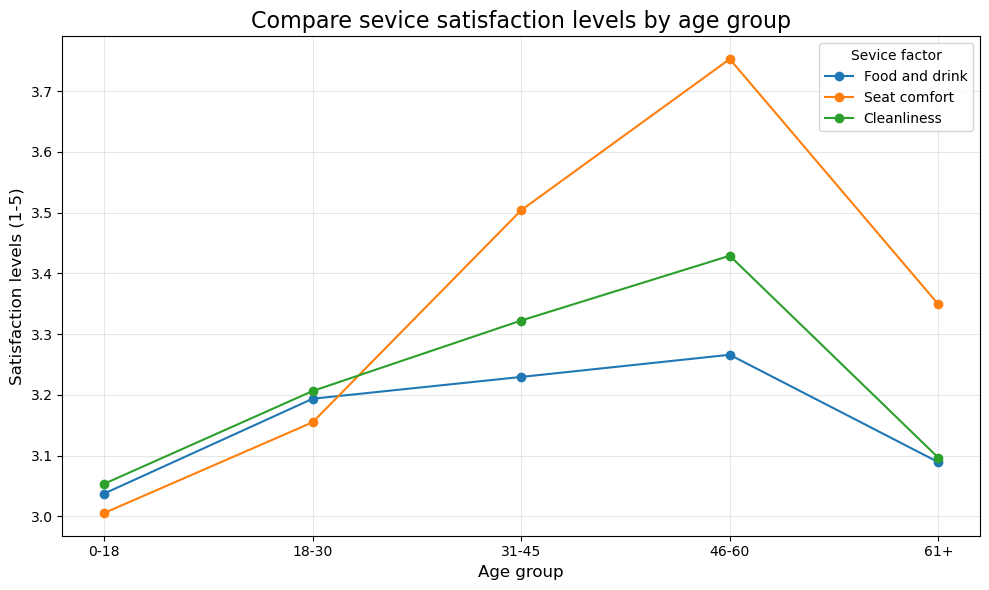

In [100]:
data_frame_copy_7 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]   
labels = ['0-18','18-30', '31-45', '46-60', '61+'] 
data_frame_copy_7["Age Group"] = pd.cut(data_frame_copy_7["Age"], bins=bins, labels=labels)
service_columns = ["Food and drink", "Seat comfort", "Cleanliness"]
age_group_means = data_frame_copy_7.groupby("Age Group", observed=False)[service_columns].mean().reset_index()
plt.figure(figsize=(10, 6))
for column in service_columns:
    plt.plot(age_group_means["Age Group"], age_group_means[column], marker="o", label=column)
plt.title("Compare sevice satisfaction levels by age group", fontsize=16)
plt.xlabel("Age group", fontsize=12)
plt.ylabel("Satisfaction levels (1-5)", fontsize=12)
plt.legend(title="Sevice factor")
plt.grid(alpha=0.3)
plt.tight_layout()


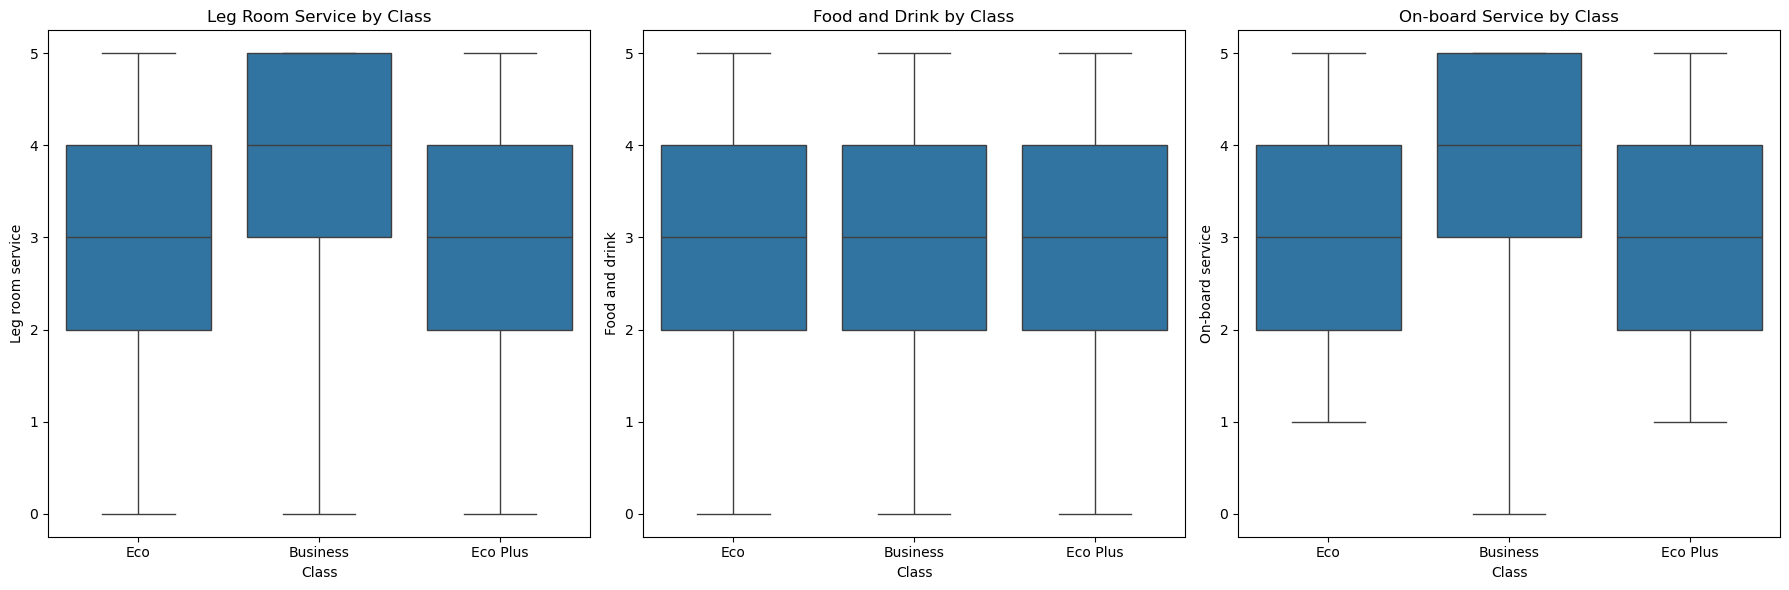

In [101]:
data_frame_copy_8 =data_frame.copy()
df = pd.DataFrame(data_frame_copy_8)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Class', y='Leg room service', data=df, ax=axes[0])
axes[0].set_title('Leg Room Service by Class')
sns.boxplot(x='Class', y='Food and drink', data=df, ax=axes[1])
axes[1].set_title('Food and Drink by Class')
sns.boxplot(x='Class', y='On-board service', data=df, ax=axes[2])
axes[2].set_title('On-board Service by Class')
plt.tight_layout()
plt.show()

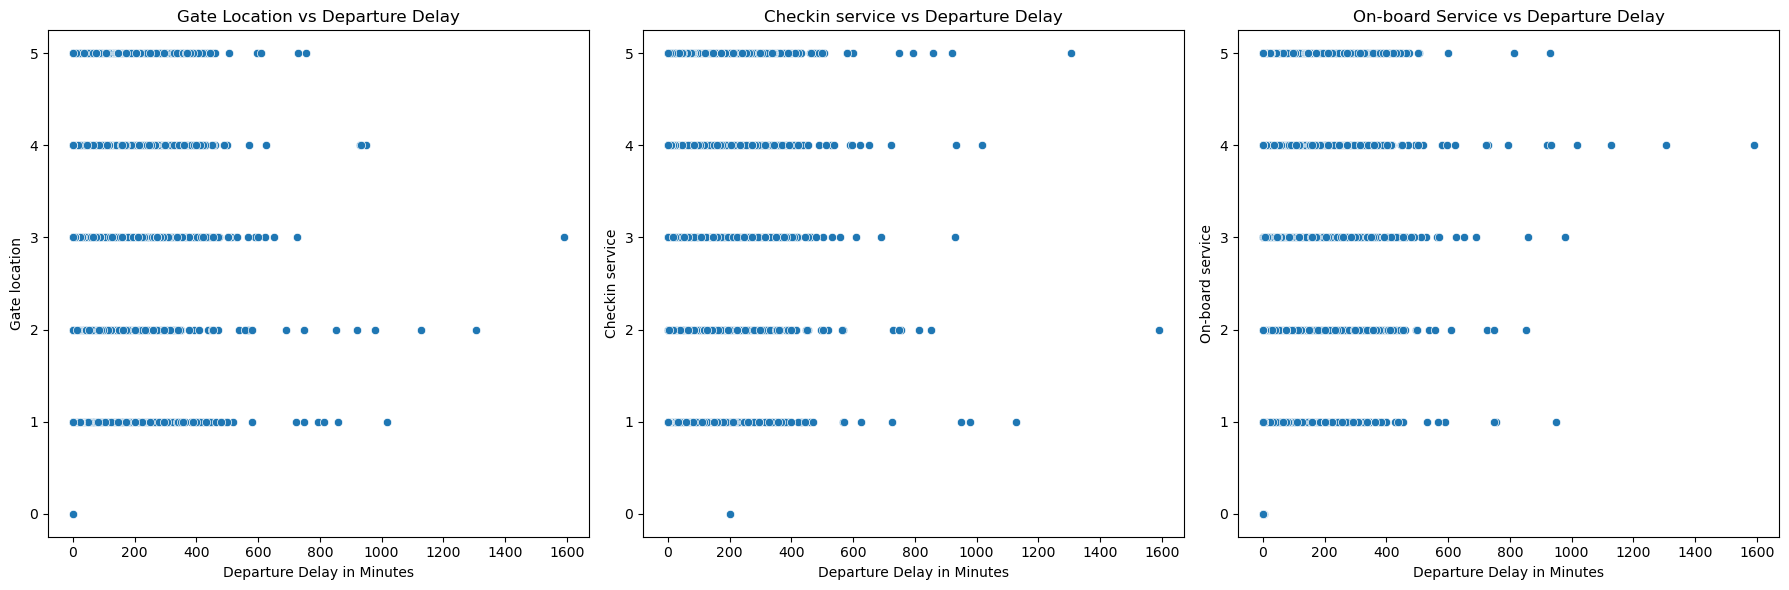

In [102]:
data_frame_copy_9 =data_frame.copy()
df = pd.DataFrame(data_frame_copy_9)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Departure Delay in Minutes', y='Gate location', data=df)
plt.title('Gate Location vs Departure Delay')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Departure Delay in Minutes', y='Checkin service', data=df)
plt.title('Checkin service vs Departure Delay')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Departure Delay in Minutes', y='On-board service', data=df)
plt.title('On-board Service vs Departure Delay')
plt.tight_layout()
plt.show()

### Biểu đồ 1 

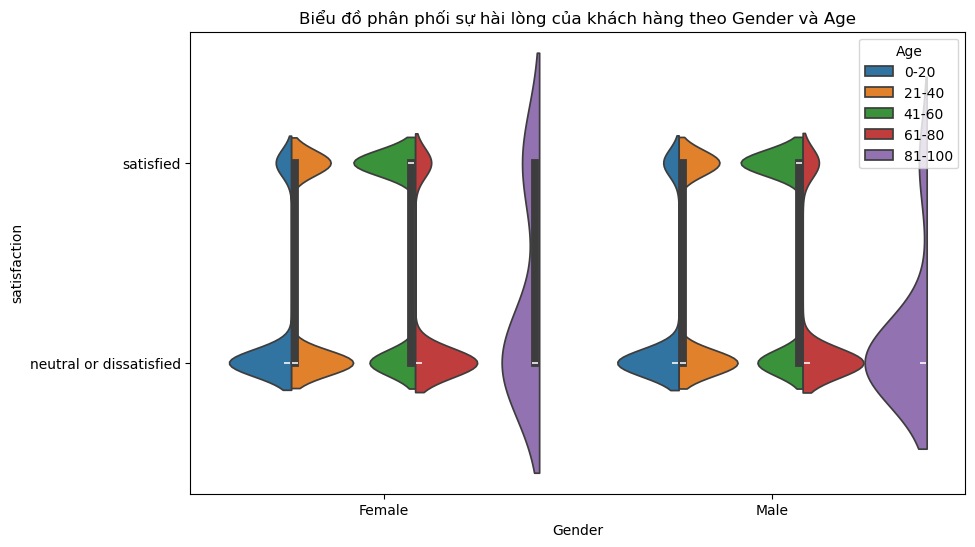

In [103]:
df_copy_1 = data_frame.copy()
bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df_copy_1['Age'] = pd.cut(df_copy_1['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='satisfaction', hue='Age', data=df_copy_1, split=True)
plt.title('Biểu đồ phân phối sự hài lòng của khách hàng theo Gender và Age')
plt.show()

### Biểu đồ 5 

C:\Users\abc\AppData\Local\Temp\ipykernel_4076\2974595537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[0], palette='Blues')
C:\Users\abc\AppData\Local\Temp\ipykernel_4076\2974595537.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[1], palette='Reds')


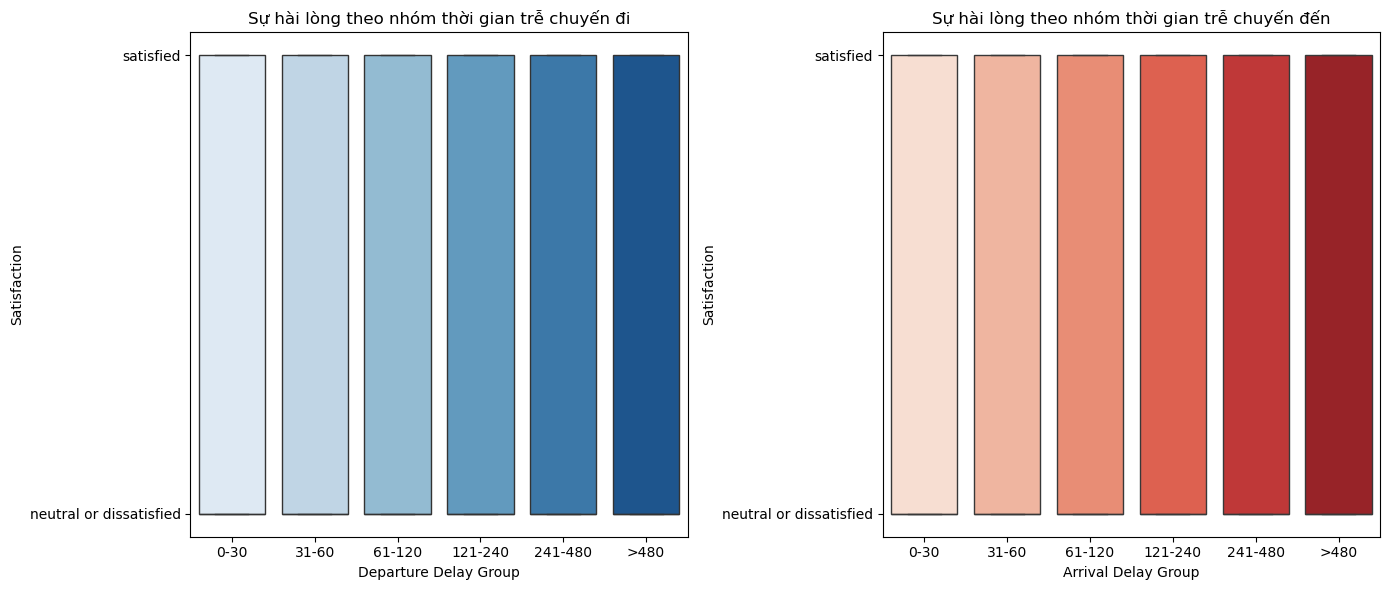

In [104]:
data_frame_copy_10 = data_frame.copy()
bins = [0, 30, 60, 120, 240, 480, 1000]
labels = ['0-30', '31-60', '61-120', '121-240', '241-480', '>480']
data_frame_copy_10['Departure Delay Group'] = pd.cut(data_frame_copy_10['Departure Delay in Minutes'], bins=bins, labels=labels)
data_frame_copy_10['Arrival Delay Group'] = pd.cut(data_frame_copy_10['Arrival Delay in Minutes'], bins=bins, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[0], palette='Blues')
ax[0].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đi')
ax[0].set_xlabel('Departure Delay Group')
ax[0].set_ylabel('Satisfaction')

sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[1], palette='Reds')
ax[1].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đến')
ax[1].set_xlabel('Arrival Delay Group')
ax[1].set_ylabel('Satisfaction')

plt.tight_layout()
plt.show()


# Model Learning 

### model satisfaction

In [105]:
data_frame_copy_2 = data_frame_copy_2.fillna(0)
X_train = data_frame_copy_2.drop(columns=['satisfaction']).iloc[:70000, 8:23]
y_train = data_frame_copy_2['satisfaction'].iloc[:70000]
X_test = data_frame_copy_2.drop(columns=['satisfaction']).iloc[70000:, 8:23]
y_test = data_frame_copy_2['satisfaction'].iloc[70000:]
model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
score = model.score(X_test,y_test)
mse = mean_squared_error(y_pre , y_test)
accuracy = accuracy_score(y_test, y_pre)
pre = recall_score(y_test, y_pre)


c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### model Arrival Delay in Minutes

In [106]:
# Chọn các đặc trưng và nhãn
X1 = data_frame[['Departure Delay in Minutes', 'Flight Distance', 'Type of Travel', 'Class']]
y1 = data_frame['Arrival Delay in Minutes']

# One-Hot Encoding cho các cột phân loại
X1 = pd.get_dummies(X1, columns=['Type of Travel', 'Class'])

# Chia tập dữ liệu
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X1_train, y1_train)

# Dự đoán và đánh giá
y1_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y1_test, y1_pred))
print("R2 Score:", r2_score(y1_test, y1_pred))
df_1 = pd.DataFrame({'y_test': y1_test, 'y_pred': y1_pred})
df_1


NameError: name 'RandomForestRegressor' is not defined